## ThinkDSP

This notebook contains code examples from Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### Chirp

Make a linear chirp from A3 to A5.

In [2]:
signal = thinkdsp.Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Here's what the waveform looks like near the beginning.

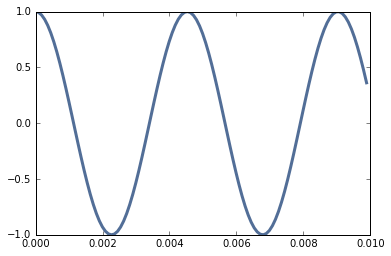

In [3]:
wave1.segment(start=0, duration=0.01).plot()

And near the end.

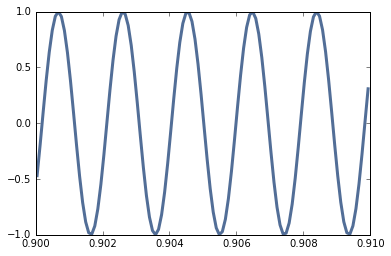

In [4]:
wave1.segment(start=0.9, duration=0.01).plot()

Here's an exponential chirp with the same frequency range and duration.

In [5]:
signal = thinkdsp.ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.make_audio()

## Leakage

Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [6]:
signal = thinkdsp.SinSignal(freq=440)

If the duration is an integer multiple of the period, the beginning and end of the segment line up, and we get minimal leakage.

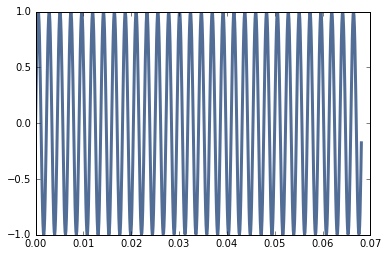

In [7]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()

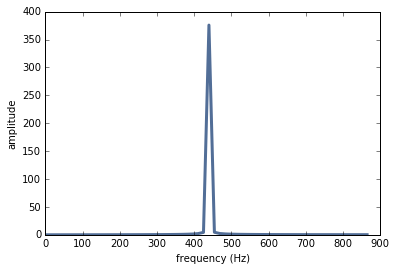

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude', legend=False)

If the duration is not a multiple of a period, the leakage is pretty bad.

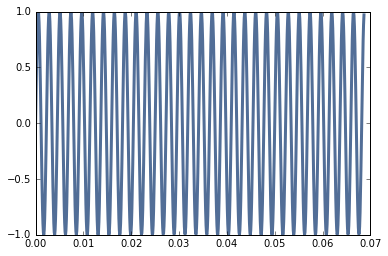

In [9]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()

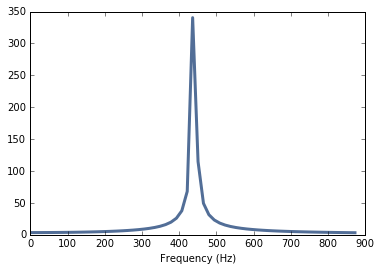

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

Windowing helps (but notice that it reduces the total energy).

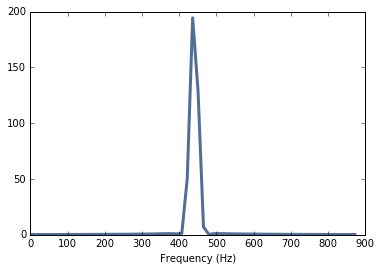

In [11]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
thinkplot.config(xlabel='Frequency (Hz)')

## Spectrogram

If you blindly compute the DFT of a non-periodic segment, you get "motion blur".

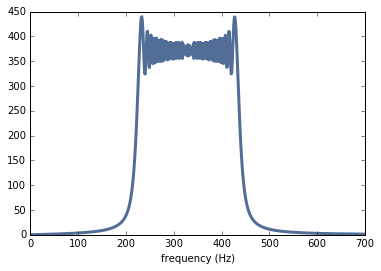

In [12]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
thinkplot.config(xlabel='frequency (Hz)')

A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

In [13]:
def plot_spectrogram(wave, seg_length):
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.0464399092971
Frequency resolution (Hz) 21.533203125


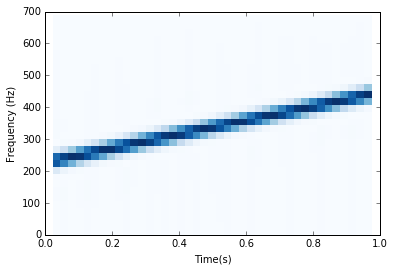

In [14]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

If you increase the segment length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.0928798185941
Frequency resolution (Hz) 10.7666015625


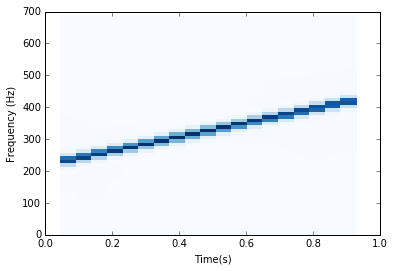

In [15]:
plot_spectrogram(wave, 1024)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.0232199546485
Frequency resolution (Hz) 43.06640625


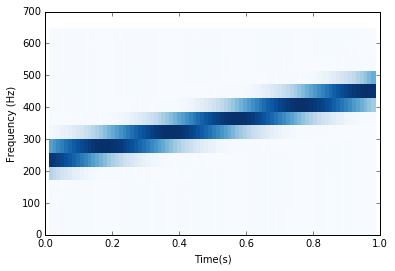

In [16]:
plot_spectrogram(wave, 256)

Time resolution (s) 0.0116099773243
Frequency resolution (Hz) 86.1328125


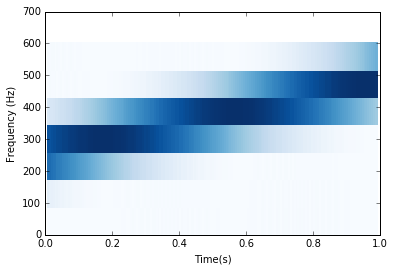

In [17]:
slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

## Spectrum of a chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [20]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal = thinkdsp.Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude')
    
    #TODO: add player

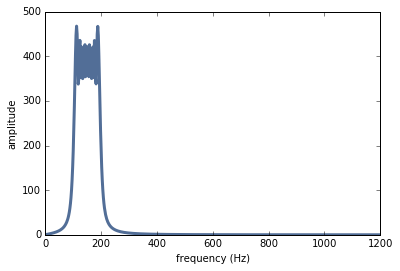

In [19]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);